[1 7]


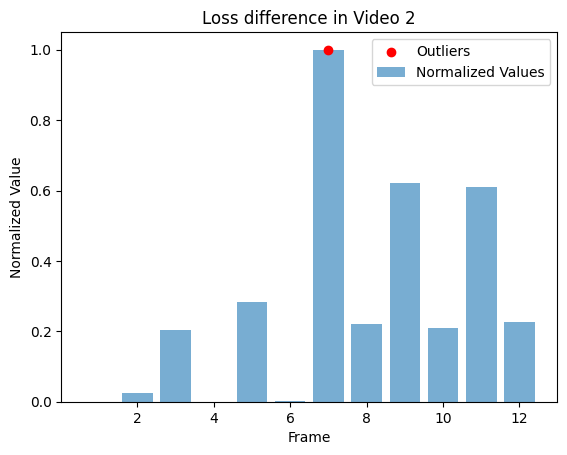

[  1  91 181]


c:\application\anaconda\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\application\anaconda\envs\pytorch\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


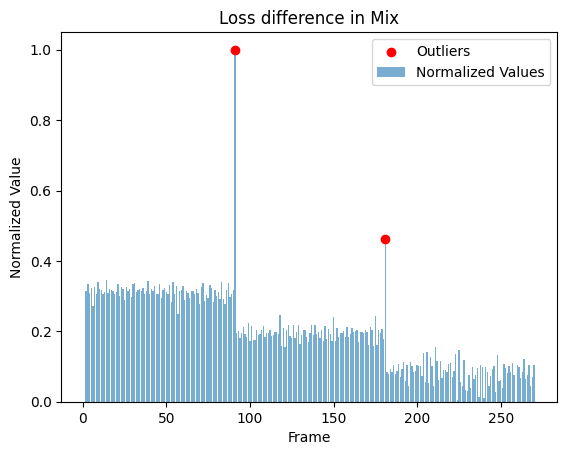

[1]


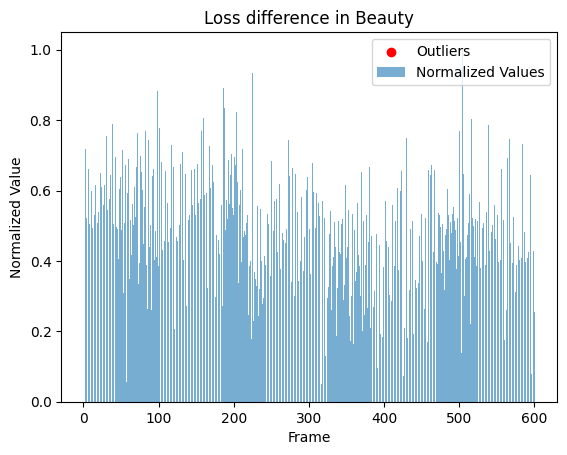

[1]


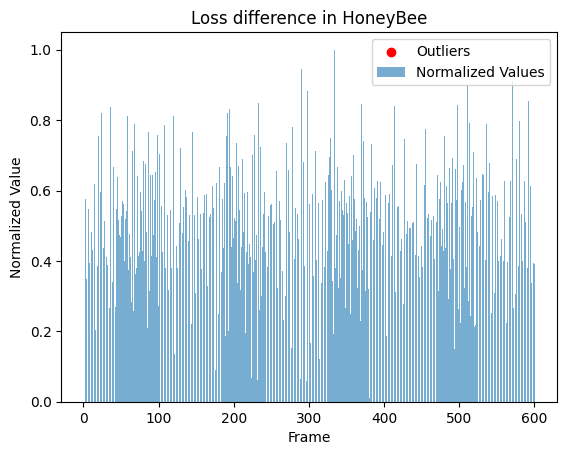

[1]


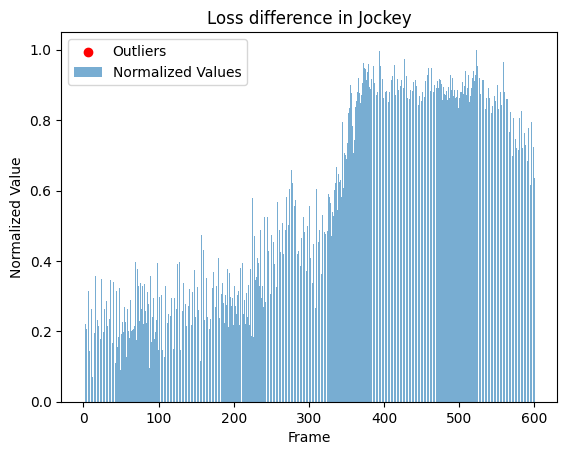

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# File paths and titles
file_info = {
    "V2_loss_list.txt": "Loss difference in Video 2",
    "Mix_loss_list.txt": "Loss difference in Mix",
    "Beauty_loss_list.txt": "Loss difference in Beauty",
    "HoneyBee_loss_list.txt": "Loss difference in HoneyBee",
    "Jockey_loss_list.txt": "Loss difference in Jockey",
}


# Function to read file and return frame numbers and Min-Max normalized values (keeping the first frame unchanged)
def read_file_and_minmax(file_path):
    frames = []
    values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(': ')
            if len(parts) == 2:
                frame = int(parts[0].replace("Frame ", ""))
                value = float(parts[1])
                frames.append(frame)
                values.append(value)
    
    # Min-Max normalization (excluding the first frame)
    values_to_normalize = values[1:]
    min_value = np.min(values_to_normalize)
    max_value = np.max(values_to_normalize)
    
    # Normalized values in range [0, 1]
    normalized_values = [values[0]] + [(v - min_value) / (max_value - min_value) for v in values_to_normalize]
    return frames, normalized_values

# Function to detect outliers based on mean difference from previous points
def detect_outliers_mean_diff(values):
    outliers = []
    for i in range(1, len(values)):
        # Calculate the mean of the previous points 
        mean_value = np.mean(values[i-50:i+50])        
        # If the difference exceeds the threshold, consider it an outlier
        if values[i] > mean_value*3:
            outliers.append(i)
    
    return outliers

# Plot each file's bar chart and fit data into a GMM
for file_path, title in file_info.items():
    frames, values = read_file_and_minmax(file_path)
    
    # Detect outliers based on mean difference
    outlier_indices = detect_outliers_mean_diff(values)
    K_f = [int(x + 1) for x in outlier_indices]
    K_f = np.insert(K_f, 0, 1)
    K_f = K_f.astype(int)
    print(K_f)
    K_frames = [frames[i] for i in outlier_indices]  # Get the frames corresponding to the outliers
    
    # Optional: Plotting the normalized values and highlighting outliers
    plt.figure()
    plt.bar(frames, values, label="Normalized Values", alpha=0.6)
    plt.scatter([frames[i] for i in outlier_indices], [values[i] for i in outlier_indices], color='red', label="Outliers")
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()
